In [1]:
import sys
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as pt

In [2]:
#ACTIVATION FUNCTION
def sigmoid(x):
  return 1/(1 + np.exp(-x))

#SOFTMAX DEFINED
def softmax(X):
    y = np.atleast_2d(X)
    axis = 1
#     subtract the max for numerical stability
    y = y - np.expand_dims(np.max(y, axis = axis), axis)
#     exponentiate y
    y = np.exp(y)
#     take the sum along the specified axis
    ax_sum = np.expand_dims(np.sum(y, axis = axis), axis)
#     finally: divide elementwise
    p = y / ax_sum
#     flatten if X was 1D
#     if len(X.shape) == 1: p = p.flatten()
    return p
    
    
# define vectorized sigmoid
sigmoid_v = np.vectorize(sigmoid)


In [3]:
trainfile = "mnist_train.csv"
weightfile = "weight.txt"
answerfile = "answers.txt"
testfile = "mnist_test.csv"

In [24]:
#READ TRAIN FILE
train_data = np.array(pd.read_csv(trainfile, header=None))#read training data
data = train_data[0:6000,:]
training_data = np.c_[np.ones(data.shape[0]),data[:,1:]]
training_label = data[ :, 0]
training_v_label = np.zeros((training_label.shape[0],10))
test = np.array(pd.read_csv(testfile, header=None))#read training data
test = np.c_[np.ones(test.shape[0]),test[:,:]]
val = train_data[6000:,:]
val_data = np.c_[np.ones(val.shape[0]),val[:,1:]]
val_label = val[ :, 0]
# print(train_data.shape)
# print(val_label.shape)

In [25]:
print(training_data.shape)#-> 6000 785
print(training_label.shape)#-> 6000
print(training_v_label.shape)#-> 6000 10
print(test.shape)#-> 3000 785

(6000, 785)
(6000,)
(6000, 10)
(3000, 785)


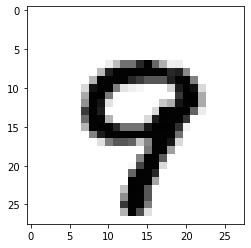

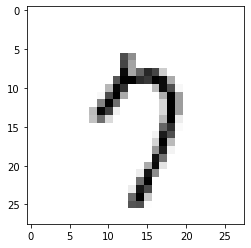

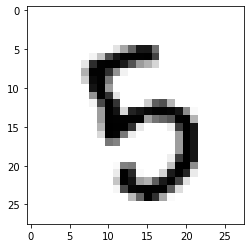

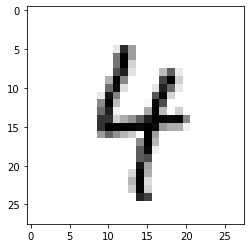

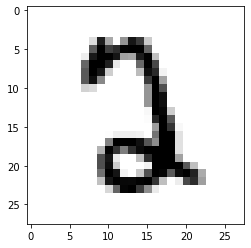

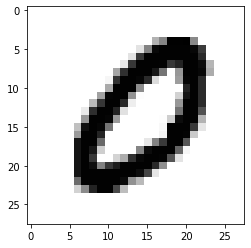

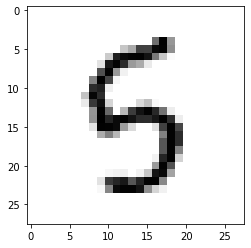

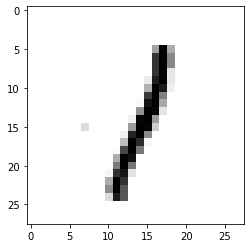

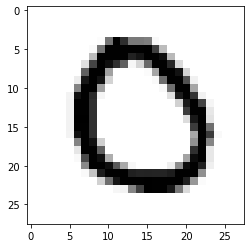

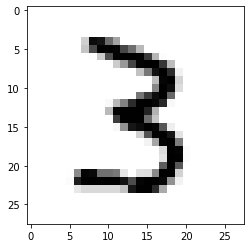

In [26]:
for i in range(10):
    d = val[i]
    d = d[1:]
    d.shape = (28, 28)
    pt.imshow(255-d, cmap='gray')
    pt.show()

In [27]:
#one hot encode
for i in range(training_label.shape[0]):
    training_v_label[i][training_label[i]] = 1   

#define parameters
max_iter = 500
batch_size = 50
lr = 0.05
hidden_layers = [50]

In [30]:
#INITIALIZE HIDDENLAYER, WEIGHT AND GRADIENT
hl = []
for x in hidden_layers:
    hl.append(np.zeros(x+1))

#RESET GRADIENT AND ERROR TO ZERO
def initialize_gradient():
    gd = []
    gd.append(np.zeros((training_data.shape[1],len(hl[0])-1)))
    for i in range(len(hl) - 1):
        gd.append(np.zeros((len(hl[i]),len(hl[i+1])-1)))
    
    gd.append(np.zeros((hl[-1].shape[0], training_v_label.shape[1])))
    return gd

def initialize_error():
    l = []
    for x in hidden_layers:
        l.append(np.zeros(x+1))
    return l

In [33]:
#random weight initialize
def initialize_random():
    gd = []
    gd.append(np.random.randn(training_data.shape[1],len(hl[0])-1)*0.01)
    for i in range(len(hl) - 1):
        gd.append(np.random.randn(len(hl[i]),len(hl[i+1])-1)*0.01)
    gd.append(np.random.randn(hl[-1].shape[0], training_v_label.shape[1])*0.01)
    return gd

In [45]:
def acuu():
    check_val = np.ones(val_data.shape[0])
    # val_data.shape[0]
    for index in range(val_data.shape[0]):
        temp_hl = initialize_error()
        sdata = val[index]
        sdata = sdata/255
    #     print("sdata", sdata)

        #forward propogation
        temp_hl[0][0] = 1
        temp_hl[0][1:] = sigmoid_v(np.dot(np.transpose(wgt[0]), sdata))

    #     print("layers* -> ", temp_hl[0])

        for layer_no in range(len(temp_hl)-1):
            temp_hl[layer_no + 1][0] = 1
            temp_hl[layer_no + 1][1:] = sigmoid_v(np.dot(np.transpose(wgt[layer_no + 1]), temp_hl[layer_no]))
    #         print("layers** -> ", temp_hl[layer_no+1])

    #     for i in range(len(temp_hl)):
    #         print("layers*** -> ", temp_hl[i])
    #     print("weight[0]", wgt[0])
    #     print("weight[-1]", wgt[-1])
    #     print(np.dot(np.transpose(wgt[-1]), temp_hl[-1]))
        pred = softmax(np.dot(np.transpose(wgt[-1]), temp_hl[-1]))
    #     print("pred ->", pred)
        check_val[index] = np.argmax(pred)
    # print(check_val)
    count = 0
    for i in range(len(check_val)):
        if val_label[i] == int(check_val[i]):
            count = count+1
    accuracy = (count/len(check_val))*100
    return accuracy
    
# acuu()

In [47]:
acc_itr = []
rate1_itr = []
rate2_itr = []
rate3_itr = []
rate4_itr = []
batch1_itr = []
batch2_itr = []
batch3_itr = []
batch4_itr = []

In [48]:
#train neural net
iteration = 0
wgt = initialize_random()
while iteration < max_iter:
    print(iteration)
    for i in range(int(training_data.shape[0]/batch_size)):
        grad = initialize_gradient()
        err = initialize_error()
        
        if training_data[i*batch_size:(i + 1)*batch_size,:].shape[0] != 0:
            batch_data = training_data[i*batch_size:(i + 1)*batch_size,:]
            batch_label = training_v_label[i*batch_size:(i + 1)*batch_size,:]
            
#             print('start grad ->', grad)
            for batch_index in range(batch_data.shape[0]):
                #initialize temporary variables
                temp_grad = initialize_gradient()
                temp_err = initialize_error()
                temp_hl = initialize_error()
                sdata = batch_data[batch_index]
                sdata = sdata/255
                slab = batch_label[batch_index]
                
                #forward propogation
                temp_hl[0][0] = 1
#                 print(wgt[0].shape)
#                 print(sdata.shape)
#                 print(len(temp_hl[0][1:]))
                temp_hl[0][1:] = sigmoid_v(np.dot(np.transpose(wgt[0]), sdata))
#                 print(np.dot(np.transpose(wgt[0]), sdata))
#                 print("sigmoid")
#                 print(temp_hl[0][1:])

                for layer_no in range(len(temp_hl)-1):
                    temp_hl[layer_no + 1][0] = 1
                    temp_hl[layer_no + 1][1:] = sigmoid_v(np.dot(np.transpose(wgt[layer_no + 1]), temp_hl[layer_no]))
                    
#                 output
                pred = softmax(np.dot(np.transpose(wgt[-1]), temp_hl[-1])).flatten()
#                 print(pred)

#                 BACKPROPAGATION
                out_err = pred - slab
#                 print(len(out_err))
#                 out_err = (slab*np.log(pred) + (1 - slab)*np.log(1 - pred))
#                 out_err = -((slab/pred)-((1 - slab)/(1 - pred)))
#                 print(out_err)
                temp_err[-1] = temp_hl[-1]*(1 - temp_hl[-1])*(np.dot(wgt[-1], out_err))
#                 print(temp_err[-1])
                temp_grad[-1] = np.dot(temp_hl[-1][:,None], out_err[None,:])
#                 print(temp_grad[-1])
                
                for j in range(-2, -len(temp_grad) ,-1):
                    temp_grad[j] = np.dot(temp_hl[j][:,None], np.transpose(temp_err[j+1][1:])[None,:])
                    temp_err[j] = temp_hl[j]*(1 - temp_hl[j])*np.dot(wgt[j], temp_err[j+1][1:])
                
                #print('iter ', iteration,' ->', temp_err)
                temp_grad[0] = np.dot(sdata[:,None], np.transpose(temp_err[0][1:])[None,:])
#                 print('yoooooooooo')
#                 print(np.sum(temp_grad[0]))
#                 print(batch_index)
                
                for b in range(len(grad)):
                    grad[b] = grad[b] + (temp_grad[b])/batch_size
#                     print("grad -> ", grad[b])
#             print('grad ->',grad[-1])
#             print(i)
#             print('________________________________')       
            
            for bb in range(len(wgt)):
                wgt[bb] = wgt[bb] - (0.5) * grad[bb]
                
#                 print(bb,wgt[bb])
#             print('weight')
#             print(wgt)
            acc_itr.append((iteration, acuu()))
#             print((iteration, acuu()))

#             rate1_itr.append((iteration, acuu()))
#             rate2_itr.append((iteration, acuu()))
#             rate3_itr.append((iteration, acuu()))
#             rate4_itr.append((iteration, acuu()))

#             batch1_itr.append((iteration, acuu()))
            batch2_itr.append((iteration, acuu()))
#             batch3_itr.append((iteration, acuu()))
#             batch4_itr.append((iteration, acuu()))

            iteration += 1
            #print(iteration)
            if iteration >= max_iter:
                break

0
120
240
360
480


In [51]:
# acc_itr

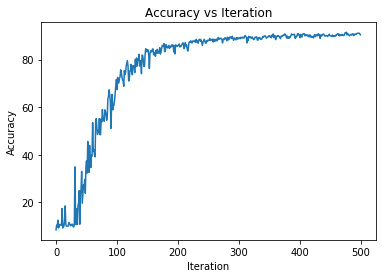

In [53]:
pt.plot(*zip(*acc_itr))
pt.title('Accuracy vs Iteration')
pt.xlabel('Iteration')
pt.ylabel('Accuracy')
pt.show()

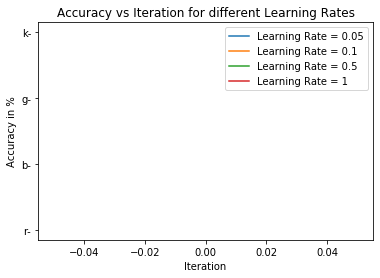

In [54]:
pt.plot(*zip(*rate1_itr),'r-',label='Learning Rate = 0.05') #lr = 0.05
pt.plot(*zip(*rate2_itr),'b-',label='Learning Rate = 0.1') #lr = 0.1
pt.plot(*zip(*rate3_itr),'g-',label='Learning Rate = 0.5') #lr = 0.5
pt.plot(*zip(*rate4_itr),'k-',label='Learning Rate = 1') #lr = 1
pt.title('Accuracy vs Iteration for different Learning Rates')
pt.xlabel('Iteration')
pt.ylabel('Accuracy in %')
pt.legend()
pt.show()

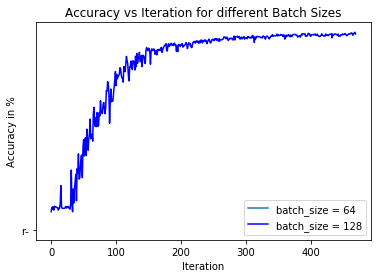

In [24]:
pt.plot(*zip(*batch1_itr),'r-',label='batch_size = 64')
pt.plot(*zip(*batch2_itr),'b-',label='batch_size = 128') 
# pt.plot(*zip(*batch3_itr),'g-',label='batch_size = 512') 
# pt.plot(*zip(*batch4_itr),'k-',label='batch_size = 1000') 
pt.title('Accuracy vs Iteration for different Batch Sizes')
pt.xlabel('Iteration')
pt.ylabel('Accuracy in %')
pt.legend()
pt.show()

In [56]:
# for l in wgt[0]:
#     print(np.sum(l)/50)

In [58]:
# final_result = np.array([])
# for f in range(len(wgt)):
#     final_result = np.append(final_result, wgt[f].flatten())

#print(hidden_layers)
# for t in final_result:
#     print(t)

# np.savetxt(weightfile, final_result)

In [19]:
result = np.ones(test.shape[0], dtype=int)
# test.shape[0]
for index in range(test.shape[0]):
    temp_hl = initialize_error()
    sdata = test[index]
    sdata = sdata/255
#     print("sdata", sdata)

    #forward propogation
    temp_hl[0][0] = 1
    temp_hl[0][1:] = sigmoid_v(np.dot(np.transpose(wgt[0]), sdata))
    
#     print("layers* -> ", temp_hl[0])

    for layer_no in range(len(temp_hl)-1):
        temp_hl[layer_no + 1][0] = 1
        temp_hl[layer_no + 1][1:] = sigmoid_v(np.dot(np.transpose(wgt[layer_no + 1]), temp_hl[layer_no]))
#         print("layers** -> ", temp_hl[layer_no+1])

#     for i in range(len(temp_hl)):
#         print("layers*** -> ", temp_hl[i])
#     print("weight[0]", wgt[0])
#     print("weight[-1]", wgt[-1])
#     print(np.dot(np.transpose(wgt[-1]), temp_hl[-1]))
    pred = softmax(np.dot(np.transpose(wgt[-1]), temp_hl[-1]))
#     print("pred ->", pred)
    result[index] = int(np.argmax(pred))
print(result)
np.savetxt(answerfile, result)

[1 5 6 ... 1 9 7]
